<h1>Intro to Stats</h1> 
<h3>With an Anime Database Exporation Project</h3> 
<p>This project is going to explore concepts of descriptive statistics using a publicly available anime database, and python, with the main libraries being numpy, pandas and matplotlib.</p>

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
#data = pd.read_csv('data\\anime-dataset-2023.csv')  
data = pd.read_csv('data/anime-dataset-2023.csv')  
data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [3]:
#Basic information about the dataset#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [4]:
#summary of numerical columns#

data.describe()


,anime_id,Popularity,Favorites,Members
count,24905.00,24905.00,24905.00,24905.00
mean,29776.71,12265.39,432.60,37104.96
std,17976.08,7187.43,4353.18,156825.24
min,1.00,0.00,0.00,0.00
25%,10507.00,6040.00,0.00,209.00
50%,34628.00,12265.00,1.00,1056.00
75%,45240.00,18491.00,18.00,9326.00
max,55735.00,24723.00,217606.00,3744541.00


There are colummns with number values writen as text instead of numbers, so we going to rewirte them as numbers 

In [5]:
new_data =['Score','Scored By','Members']
#droping unknow values of score, scored by and members
data['Score'] = pd.to_numeric(data['Score'], errors='coerce')
data['Scored By'] = pd.to_numeric(data['Scored By'], errors='coerce')
data['Members'] = pd.to_numeric(data['Members'], errors='coerce')
data.describe()

,anime_id,Score,Popularity,Favorites,Scored By,Members
count,24905.00,15692.00,24905.00,24905.00,15692.00,24905.00
mean,29776.71,6.38,12265.39,432.60,29974.38,37104.96
std,17976.08,0.93,7187.43,4353.18,116934.79,156825.24
min,1.00,1.85,0.00,0.00,100.00,0.00
25%,10507.00,5.73,6040.00,0.00,384.00,209.00
50%,34628.00,6.39,12265.00,1.00,1760.00,1056.00
75%,45240.00,7.06,18491.00,18.00,10855.50,9326.00
max,55735.00,9.10,24723.00,217606.00,2660903.00,3744541.00


In [6]:
#calculating the mean of the score, scored by and members
print('mean',data['Score'].mean())
print('median',data['Score'].median())
print('mode',data['Score'].mode()[0])
print('min',data['Score'].min())
print('max',data['Score'].max())
print('std',data['Score'].std())

mean 6.38088962528677
median 6.39
mode 6.31
min 1.85
max 9.1
std 0.9286960610287779


## The Normal distribution


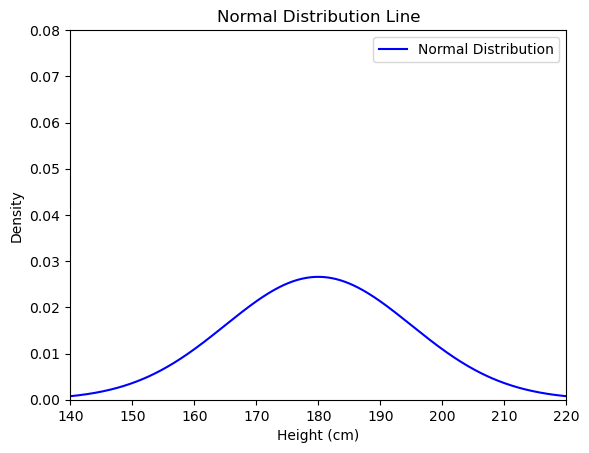

In [40]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution (based on US data)
mean_height = 180 #mean height in cm
std_dev_height = 15  # Standard deviation in cm

# Generate x values for the normal distribution
x = np.linspace(mean_height - 4*std_dev_height, mean_height + 4*std_dev_height, 1000)

# Calculate the PDF for the normal distribution
pdf = norm.pdf(x, mean_height, std_dev_height)

#setting the scale
plt.xlim(140, 220)
plt.ylim(0, 0.08)
# Plot the normal distribution line
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.title("Normal Distribution Line")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

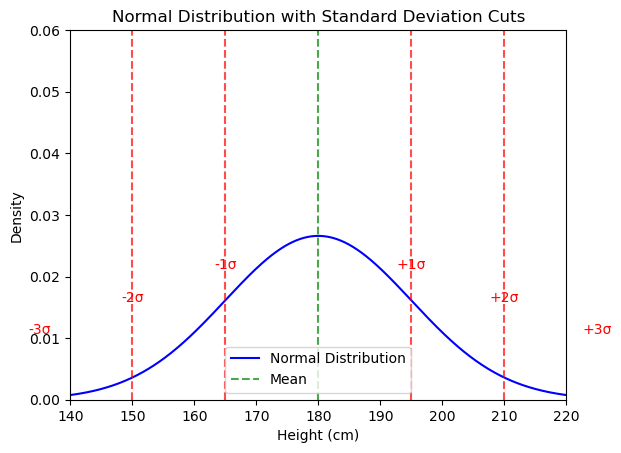

In [41]:
# Plot the normal distribution line
plt.plot(x, pdf, label='Normal Distribution', color='blue')

# Add vertical lines for standard deviation cuts
mean_height = 180  # Mean height in cm
std_cuts = [mean_height - std_dev_height, mean_height + std_dev_height,
            mean_height - 2*std_dev_height, mean_height + 2*std_dev_height,
            mean_height - 3*std_dev_height, mean_height + 3*std_dev_height]

plt.axvline(mean_height, color='green', linestyle='--', label='Mean', alpha=0.7)
for cut in std_cuts:
    plt.axvline(cut, color='red', linestyle='--', alpha=0.7)

plt.xlim(140, 220)
plt.ylim(0, 0.06)
# Add labels for the standard deviation cuts
plt.text(mean_height - std_dev_height, max(pdf)*0.8, '-1σ', color='red', horizontalalignment='center')
plt.text(mean_height + std_dev_height, max(pdf)*0.8, '+1σ', color='red', horizontalalignment='center')
plt.text(mean_height - 2*std_dev_height, max(pdf)*0.6, '-2σ', color='red', horizontalalignment='center')
plt.text(mean_height + 2*std_dev_height, max(pdf)*0.6, '+2σ', color='red', horizontalalignment='center')
plt.text(mean_height - 3*std_dev_height, max(pdf)*0.4, '-3σ', color='red', horizontalalignment='center')
plt.text(mean_height + 3*std_dev_height, max(pdf)*0.4, '+3σ', color='red', horizontalalignment='center')

# Add title and labels
plt.title("Normal Distribution with Standard Deviation Cuts")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

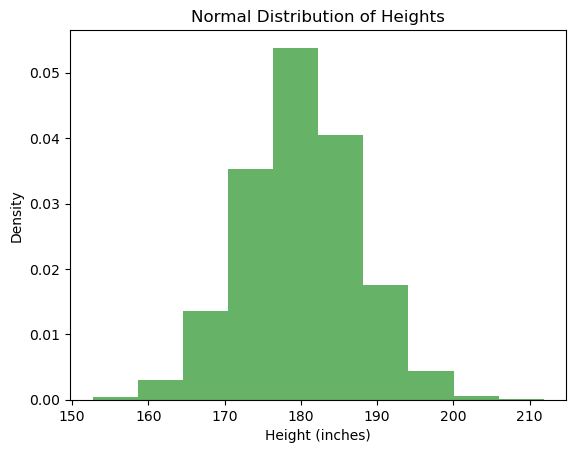

In [22]:
# Parameters for the normal distribution (based on US data)
mean_height = 180 #mean height in cm
std_dev_height = 7.5  # Standard deviation in cm

# Generate a normal distribution
heights = np.random.normal(mean_height, std_dev_height, 10000)

# Plot the distribution
plt.hist(heights, bins=10, density=True, alpha=0.6, color='g')
plt.title("Normal Distribution of Heights")
plt.xlabel("Height (inches)")
plt.ylabel("Density")
plt.show()

Mean Salary: 64893.53
Median Salary: 63768.86
Standard Deviation: 24609.04


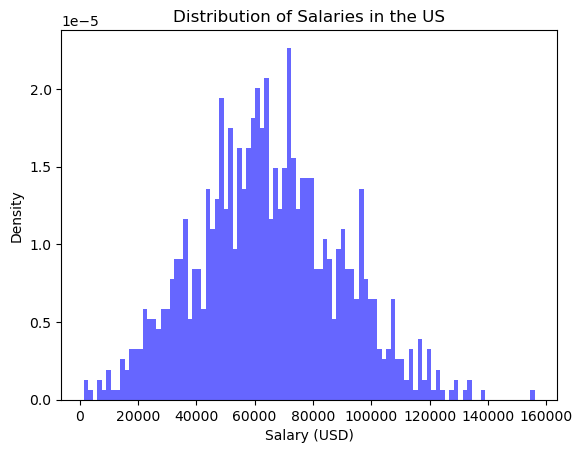

In [44]:
# Assuming `salaries` is a numpy array or pandas Series containing salary data
salaries = np.random.normal(66000, 25000, 1000)  # Example: Generate synthetic salary data

#salaries= np.append(salaries, 1000000)
#print summary statistics
mean = np.mean(salaries)
median = np.median(salaries)
std_dev = np.std(salaries)
print(f"Mean Salary: {mean:.2f}")
print(f"Median Salary: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Plot the distribution
plt.hist(salaries, bins=100, density=True, alpha=0.6, color='blue')
plt.title("Distribution of Salaries in the US")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.show()

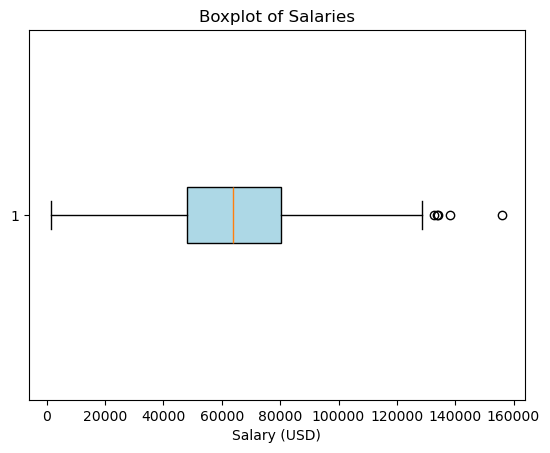

In [45]:
plt.boxplot(salaries, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Salaries")
plt.xlabel("Salary (USD)")
plt.show()